# Aprendizaje supervisado con scikit-learn

- Los valores a predecir ya están.
- Utiliza funciones para predecir el valor de una variable objeto.

Existe dos tipos de aprendizaje supervisado:

1. Clasificación.- Predice la etiqueta o categoría de una observación binaria. Por ejemplo podemos predecir si una transacción bancaria es fraudulenta o no (Clasificación binaria).
2. Regresión.- Se utiliza para predecir valores continuos. Por jemplo, predice el precio de propiedad dado la característica (variable predictiva o variable independiente) el número de dormitorios y el tamaño de una propiedad. Lo que llamamos variable objeto hace referencia a variable dependiente o variable respuesta.

CONDICIONES:

1. Los datos no deben tener valores faltantes.
2. Deben ser numéricos.
3. Se almacenan como DataFrames, series o matrices NumPy.

scikit-learn sigue la misma sintaxis para todo los modelos de aprendizaje supervisado, lo que hace que el flujo de trabajo sea repetible.

In [7]:
# LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Importar libraria scikit-learn
from sklearn.module import Model
# Creamos una instancia del modelo
model = Model()
# Ajustamos el modelo X, a una matriz de nuestras características y a "y" una matriz de nuestros valores de variable objetivo
model.fit(X,y)
# Utilizamos el método de predicción de puntos del modelo y pasamos otras nuevas observaciones.
predictions = model.predict(X_new)

ModuleNotFoundError: No module named 'sklearn.module'

In [165]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Clasificación

In [199]:
# DATA
ruta_archivo = '/home/jovyan/notebooks/data/telecom_churn_clean.csv'
churn_df = pd.read_csv(ruta_archivo,index_col = None)
churn_df = churn_df.iloc[:,1:]

- En esta data, la variable objetivo sería: Churn.- Clientes que se van de la empresa.

#### PASOS PARA CONTRUCCIÓN DEL MODELO:

1. Construir el clasificador que aprende de los datos etiquetados que le pasaremos.
2. Pasar datos sin etiquetar como entrada.
3. Hacer que prediga etiquetas para estos datos invisibles.

A medida que el clasificador aprende de los datos etiquetados, los llamaremos **DATOS DE ENTRENAMIENTO**

Para ello utilizaremos un algoritmo llamado **K-Vecimos más cercanos (KNN)**.

La idea de este algoritmo es predecir la etiqueta de cualquier punto de datos "k"; por ejemplo, 3 datos etiquetados más cercanos. Utiliza la votación por mayoria, que hace predicciones basadas en la etiqueta que tiene la mayoria de los vecinos más cercanos.

In [200]:
# Para ajustar el modelo KNN usando scikit-learn importamos:
from sklearn.neighbors import KNeighborsClassifier

# Dividimos nuestros datos en X e y. Convertimos con .values al Array
X = churn_df[["total_day_charge","total_eve_charge"]].values
y = churn_df["churn"].values

# Imprimir las observaciones de dos características de 3333 observaciones
print(X.shape,y.shape)

# Creamos una instancia de nKNeighborsClassifier, con neighbors 15.
knn = KNeighborsClassifier(n_neighbors = 15)

# Ajustamos el clasificador a nuestros datos etiquetados aplicando la función de clasificador
knn.fit(X,y)

# Nuevas observaciones
X_new = np.array([
    [56.8,17.5],
    [24.4,24.1],
    [50.1,10.9]
])
# Imprimir
print(X_new.shape)

# Usando el métodod de predicción de puntos del clasificador le pasamos datos invisibles
predictions = knn.predict(X_new)

# 1. Se va, 0. se queda.
print('Predicción: {}'.format(predictions))

(3333, 2) (3333,)
(3, 2)
Predicción: [1 0 0]


La impresión de las predicciones devuelve un valor binario para cada observación o fila en X_new

#### Medición del rendimiento del modelo

- En clasificación, la **precisión** (knn.score) es una métrica de uso común.
$$Precisión = \dfrac{Predicciones \; correctas}{Total \; observaciones}$$

Dado que estos datos se utilizaron para entrenar el modelo, el rendimiento no será el indicado, para otros datos invisibles. 

Por lo tanto, es común dividir los datos en: 
- un conjunto de entrenamiento y
- un conjunto de prueba.

1. Ajustamos el clasificador usando el conjunto de entrenamiento.
2. Calculamos la precisión del modelo comparándola con las etiqutas del conjunto de prueba.

Para medir importamos lo siguente:

In [201]:
# Importar train_test_split
from sklearn.model_selection import train_test_split

# Llamamos train_test_split pasando nuestras características y objetivos (array)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                   random_state = 21,
                                                   stratify = y)
# Es buena práctica garantizar que nuestra división refleje la proporción de etiquetas en nuestros datos
# Entonces, si la deserción ocurre en el 10% de las observaciones, queremos que el 10% de las etiquetas
# en nuestro conjunto de entrenamiento y prueba represente la deserción, (strarify = y)


# Ahora creamos una instancia de un modelo KNN y lo ajustamos a los datos de entrenamiento utilziando el método de ajsute de puntos
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)

# Comprobar la precisión con el método de puntuación de puntos.
print(knn.score(X_test,y_test))

0.872


La precisión de nuestros modelo es 87%, lo cual es bajo dado que nuetras etiquetas tiene una proporción de 9 a 1.

#### Interpretación de k,

A medida que k aumenta, el límite de decisión es menos afectado por observaciones individuales, lo que refleja un modelo más simples:

1. Estos modelos simples con mayor "k" son menos capaces de detectar relaciones en el conjunto de datos, lo que se conoce como **desajuste**.
2. Contrariamente los modelos, con valores pequeños de "k", pueden ser sensibles al ruido en los datos de entrenamiento en lugar de reflejar tendencias generales. Esto se conoce como **Sobreajuste**.

Podemos también interpretar "k" usando una **curva de complejidad del modelo**. Donde podemos calcular la precisión del entrenamiento.

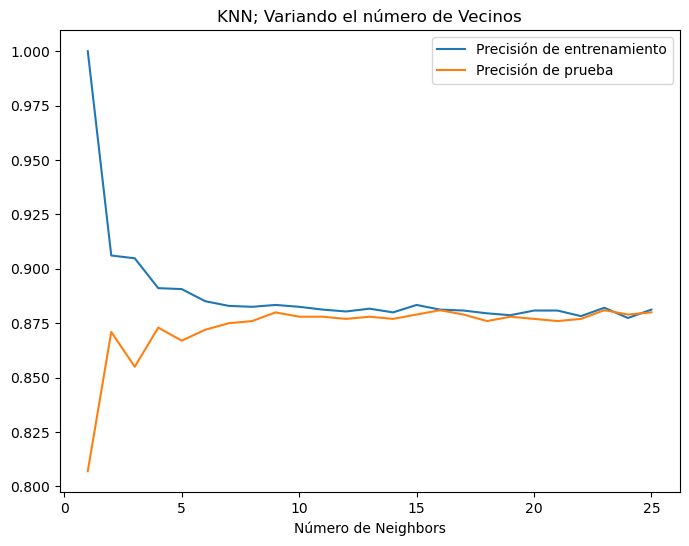

In [202]:
# Creamos diccionarios vacíos para almacenar las precisiones de nuestro
# entrenamiento y prueba, y una matriz que contiene un rango de valores "k".
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)

# Usamos un bucle for para repetir nuestro flujo de trabajo anterior, construyendo 
# varios modelos usando un número diferente de vecinos.
for neighbor in neighbors:
    knn =  KNeighborsClassifier(n_neighbors = neighbor)
    # Entrenamos
    knn.fit(X_train, y_train)
    # Calculamos la precisión del conjunto de entrenamiento y prueba.
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

# Graficamos
plt.figure(figsize = (8,6))
plt.title('KNN; Variando el número de Vecinos')
plt.plot(neighbors, train_accuracies.values(), label = "Precisión de entrenamiento")
plt.plot(neighbors, test_accuracies.values(), label = "Precisión de prueba")
plt.legend()
plt.xlabel("Número de Neighbors")
plt.show()

A medida de k aumenta más alla de 7, vemos un sobreajuste en datos de entrenamiento y de prueba, donde el rendimiento 

**NOTA:** Para poder tener mejor precisión, dado que se pueden tener escalas diferentes, podemos utilizar la fórmula de Normalización Min-Max:
$$z_i=\dfrac{x_1-\min(x)}{\max(x)-\min(x)}$$
Siempre que no haya valores extremos.

-------------------------------------------------------------------

--------------------------------------------------------------------

--------------------------------------------------------------------

## Regresión

Normalmente se tiene valores continuos. 

Empecemos con datos de salud de las mujeres para predecir los niveles de glucosa en sangre.

**VARIABLES**:

- pregnancies -> número de embarazos
- glucose -> Glucosa
- triceps -> pliegue cutáneo del tríceps
- insulin -> Niveles de insulina
- bmi -> indice de masa corporal
- age -> edad
- diabetes -> Estado de diabetes 1. indica diagnostico, 2. ausencia de diagnostico.

In [9]:
# DATA
ruta_archivo = '/home/jovyan/notebooks/data/diabetes_clean.csv'
diabetes_df = pd.read_csv(ruta_archivo,index_col = None)
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# Crear característica y valor objetivo
X = diabetes_df.drop("glucose", axis = 1).values
y = diabetes_df["glucose"].values

# Corroborar que sean de tipo array
print(type(X),type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


- Empecemos a predecir los niveles de glucosa en sangre a partir de una única característica: el índice de masa corporal

In [11]:
# Cortamos la columna BMI de X, que es la cuarta columna
X_bmi = X[:,4]

# Verificar la forma de X e y
print(y.shape,X_bmi.shape)

# La forma para X_bmi no es correcta debido a que debe ser (768,1).
# Para ello aplicamos lo siguente
X_bmi = X_bmi.reshape(-1,1)
print(y.shape,X_bmi.shape)

(768,) (768,)
(768,) (768, 1)


- Grafiquemos los niveles de glucosa en sangre en función del ínidce de masa corporal.

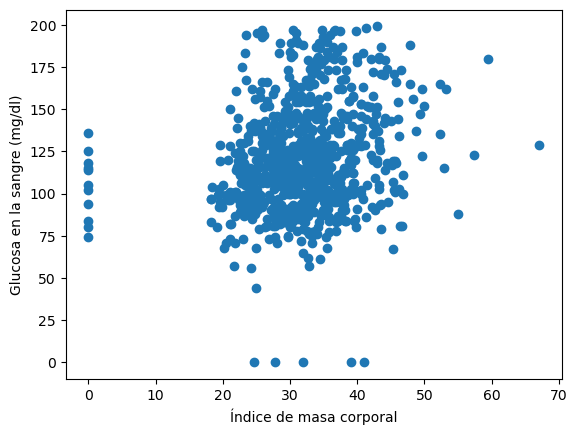

In [12]:
# Grafico
plt.scatter(X_bmi, y)
plt.ylabel("Glucosa en la sangre (mg/dl)")
plt.xlabel("Índice de masa corporal")
plt.show()

- Ahora ajustemos el modelo y tracemos las predicciones

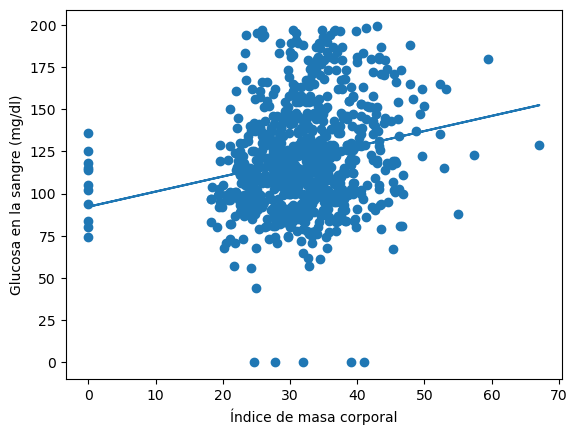

In [13]:
# Importar LinearRegression
from sklearn.linear_model import LinearRegression

# Creamos una instancia de nuestro modelo
reg = LinearRegression()

# Ajustamos el modelo a todas nuestras observaciones de características
reg.fit(X_bmi, y)

# Crear la variable de predicciones
predictions = reg.predict(X_bmi)

# Graficamos
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions)
plt.ylabel("Glucosa en la sangre (mg/dl)")
plt.xlabel("Índice de masa corporal")
plt.show()

### Conceptos básicos de regresión lineal

Se tiene,

$$y = ax + b$$

Donde, 
$$
\begin{array}{rcl}
    y &=& Objeto\\
    x &=& caracteristica\\
    a &=& Pendiente\\
    b &=& Intersección
\end{array}
$$

- ¿Cómo escogemos $a$ y $b$?
    - Podemos definir una función de error para cualquier linea dada.
    - Luego, podemos elegir la linea que minimice esta función.
 
La función de error se denomina **funciones de pérdida o de costo**

- La distancia entre el punto dado y la linea de regresion se llama **suma de residuos**, los cuales querremos minimizar. Es decir,
$$RSS = \sum_{i=1}^n \left(y_i-\hat{y}_i\right)^2$$

Este tipo de regresión lineal se le llama **Minimos cuadrados ordinarios** o **OLS**.

- Cuando se agregan más funciones se le llama regresión lineal múltiple.

Ahora, realizaremos una regresión lineal múltiple con los datos de diabetes:

In [14]:
# Importar librerias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# DATA
ruta_archivo = '/home/jovyan/notebooks/data/diabetes_clean.csv'
diabetes_df = pd.read_csv(ruta_archivo,index_col = None)
diabetes_df.head()

# Crear característica y valor objetivo
X = diabetes_df.drop("glucose", axis = 1).values
y = diabetes_df["glucose"].values

# Dividimos el conjunto de datos en entranamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3,
                                                   random_state = 42)

# Instanciamos el modelo
reg_all = LinearRegression()

# Ajustamos el modelo
reg_all.fit(X_train, y_train)

# Predecimos el conjunto de prueba
y_pred = reg_all.predict(X_test)

- La métrica predeterminada para evaluar el desempeño del modelo de regresión es $R^2$ que cuantifica la **cantidad de varianza objetivo** que se explica por las características. 1 nos dice que las características explican completamente la variación del objetivo.

- Para calcular $R^2$, llamamos al método de puntación de puntos del modelo:

In [15]:
# Calculamos R^2
reg_all.score(X_test, y_test)

0.28280468810375115

- Otra forma de evaluar el desempeño de un modelo de regresión es tomar la **media de la suma residual de cuadrados**:
$$MSE = \dfrac{1}{n} \sum_{i=1}^n \left(y_i-\hat{y}_i\right)^2$$
Llamado **Error cuadrático medio**. El MSE se mide en unidades de nuestra variable objetivo al cuadrado. Por ejemplo, si el modelo predice un valor en dólares, el MSE estará en dólares al cuadrado. Para convertir a dolares:
$$RMSE=\sqrt{MSE}$$
Conocida como **raìz del error cuadrático medio**.
Para calcular el RMSE se tiene:

In [16]:
# Importar RMSE
from sklearn.metrics import mean_squared_error

# Calcular el error cuadrático medio
mean_squared_error(y_test, y_pred, squared = False)

26.341459582232265

- El modelo tiene un error promedio para los niveles de glucosa en sangre de alrededor de 24 miligramos por decilitro.

### Validación Cruzada

El $R^2$ depende de la forma en que dividimos los datos por lo que no puede ser representativo para generalizar a datos invisibles. Para combatir esta dependencia de lo que es esencialmente una división aleatoria, utilizamos una técnica llamada validación cruzada.

1. Se empieza dividiendo el conjunto de datos en cinco grupos.
2. Reservemos el primer grupo como conjunto de prueba.
3. Los cuatro restantes predicen los conjuntos de prueba.
4. Calcular nuestra métrica de interes como el $R^2$.
5. Reservamos el segundo grupo como nuestro conjunto de prueba, predecimos con los restantes conjuntos de prueba y calculamos de nuevo nuestro grupo de interes.
6. Así sucesivamente.
7. Cómo resultado adquirimos, por ejemplo cinco $R^2$'s a partir de los cuales podemos calcular estadística descriptivas, como la media, la mediana y lso intervalos de confianza.

Ahora bien, usar muchos grupos es costo computacionalmente. Para realizar una validación cruzada K-fold en scikit-learn, importamos cross_val_score de sklearn-dot-model_selection y KFold que nos permite establecer una semilla y mezclar datos, haciendo que nuestros resultados sean repetibles en sentido decendente.

In [17]:
# Importamos cross_val_score y KFold
from sklearn.model_selection import cross_val_score, KFold

# Llamamos a KFold
kf = KFold(n_splits = 6, shuffle = True, random_state = 42)
# n_splits = 6 pliegues o grupos.
# shuffle = Mezcla los datos antes de dividirlos.

# Instaciamos el modelo
reg = LinearRegression()

# Llamamos a cross_val_score
cv_results = cross_val_score(reg, X, y, cv = kf)
# La longitud de la matriz es el número de pliegues (grupos) utilizados

# Impromir cv_results
print(cv_results)

# Calculamos la media y la desviación estándar de cv_results
print("Media:", np.mean(cv_results),"Deviación estandar:", np.std(cv_results))

# Calcular el interalo de confianza
print('Intervalo de confianza al 95%:', np.quantile(cv_results,[0.025,0.975]))

[0.26207548 0.28228176 0.41203082 0.23785884 0.41634629 0.30398869]
Media: 0.31909697867344794 Deviación estandar: 0.070153206101142
Intervalo de confianza al 95%: [0.24088592 0.41580685]


### Regresión regularizada 

Exploraremos la regularización en regresión, una técnica para evitar el sobreajuste.

Recordemos que ajustar **un modelo de regresión minimiza una pérdida**. Si permitimos que estos ajustes (coeficientes) sean grandes, podemos producir un sobreajuste.

Por lo tanto, es una práctica común alterar la función de pérdida para que penalice los coeficientes grandes, a esto se le llama **regularización**.

Existen dos tipos de regresión regularizada:

1. Regresión Ridge.
2. Regresión Lasso.

#### Regresión Ridge

Utilizamos la función de pérdida de mínimos cuadrados ordinarios más el valor al cuadrado de cada coeficiente, multiplicado por una constante $\alpha$:
$$\text{Función de pérdida OLS} + \alpha\cdot \sum_{i=1}^n a_i^2.$$

La idea es que al minimizar la función de pérdida, los modelos son penalizados por coeficientes con valores positivos o negativos grandes. Luego elegimos un valor $\alpha$ para poder ajustar y predecir, de tal forma el modelo podría funcionar mejor. Para hacer una analogía es como elegir un $k$ optimo en KNN. EL $\alpha$ se conoce como el hiperparámetro. Esta $\alpha$ controla la complejidad del modelo.

- Al utilizar $\alpha=0$, los coeficientes no se penalizas y puede ocurrir un sobreajuste.
- Un $\alpha$ alto, significa que los coeficientes grandes se ven penalizados, lo que puede provocar un desajuste.

In [18]:
# Ridge regressión en scikit-learn
from sklearn.linear_model import Ridge

# Para resaltar el impacto de diferentes valores de alpha, creamos un espacio vacio
scores = []
for alpha in [0.1,1.0,10.0,100.0,1000.0]:
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train,y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test,y_test))

# Imprimir
print(scores)

[0.2828466623222221, 0.28320633574804766, 0.2853000732200006, 0.26423984812668133, 0.19292424694100963]


- Vemos que el rendimiento empeora a medida que aumenta alfa

#### Valor optimo alpha en la regresión Rigde

In [30]:
from sklearn.linear_model import RidgeCV

# Definir los valores de alpha que quieres probar
alphas = [0.01,0.1, 1.0, 10.0, 100.0, 1000.0]

# Crear el objeto RidgeCV
ridge_cv = RidgeCV(alphas=alphas, cv=5)

# Ajustar el modelo
ridge_cv.fit(X_train, y_train)

# Imprimir el alpha óptimo
print("El alpha óptimo es: ", ridge_cv.alpha_)

# Predecir y calcular el score con el alpha óptimo
y_pred = ridge_cv.predict(X_test)
score = ridge_cv.score(X_test, y_test)
print("El score con el alpha óptimo es: ", score)


El alpha óptimo es:  1.0
El score con el alpha óptimo es:  0.28320633574804766


### Regresión Lasso

Función de pérdida OLS (MCO) más el valor absoluto de cada coeficiente multiplicado por alguna constantes $\alpha$:
$$\text{Función de pérdida OLS} + \alpha \cdot \sum_{i=1}^n |a_i|.$$ 

- **La regresión Lasso se puede utilizar para evaluar la importancia de las caracteristica**.
- Esto se debe a que tiende a reducir a cero los coeficientes de las caracteristicas menos importantes.
- Las caracteristicas cuyos coeficientes no se reducen a cero se seleccionan mediante el algoritmo de Lasso.

In [20]:
# Importar regresión Lasso
from sklearn.linear_model import Lasso

# Para resaltar el impacto de diferentes valores de alpha, creamos un espacio vacio
scores = []
for alpha in [0.1,1.0,10.0,20.0,50.0]:
    ridge = Lasso(alpha = alpha)
    ridge.fit(X_train,y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test,y_test))

# Imprimir
print(scores)

[0.28575325694826237, 0.29795609755827845, 0.17989838789273893, 0.18127361610181125, 0.15679544303617987]


- El rendimiento cae sustancialmente a medida que $\alpha$ supera los 10

#### Lasso para seleccionar caracteristicas

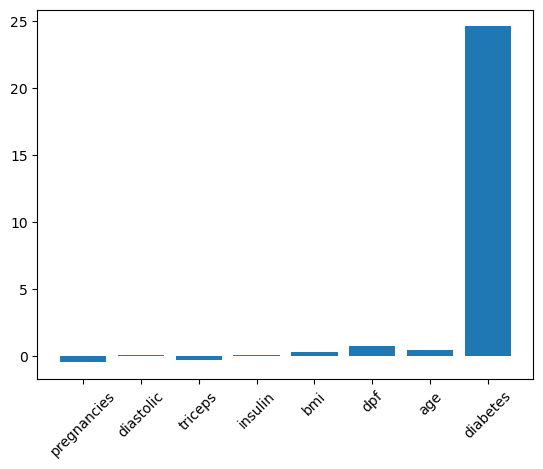

In [27]:
# importar Lasso
from sklearn.linear_model import Lasso

# Creamos una matriz de características y objetivos, y utilizamos el conjunto de datos
X = diabetes_df.drop("glucose", axis = 1).values
y = diabetes_df["glucose"].values

# Extraer los nombres de la columnas
names = diabetes_df.drop("glucose", axis = 1).columns

# Creamos una instancia Lasso, estableciendo alpha en cero punto uno.
lasso = Lasso(alpha = 0.1)

# Ajustamos el modelo a los datos y extraemos el coeficiente
lasso_coef = lasso.fit(X, y).coef_

# Trazamos los coeficientes para cada caracteristica
plt.bar(names, lasso_coef)
plt.xticks(rotation = 45)
plt.show()

- Podemos ver que el predictor más importante para nuestra variable objetivo es el nivel de glucosa, de si un individuo tiene diabetes o no. Esto nos permite comunicar a las personas que no son del ámbito técnico y para identificar los factores importantes para los predictores.

- En **Conclusión** la regresión Ridge puede ser útil si queremos conservar todas las variables explicativas. Y la regresión Lasso si creemos que sólo queremos mantener un subconjunto de variables explicativas.

 ## Ajuste refinado del modelo

Consideremos un modleo para predecir si una transacción bancaria es fraudulento, donde sólo el $1\%$ de las transacciones son realmente fraudulentas.

 Podríamos construir un modelo que clasifique cada transacción como legítima, que tendría una precisión del 99%.

 Sin embargo, haría un terrible trabajo al predecir el fraude. Las situación en la que una clase es más frecuente se llama **desequilibrio de clases**. Aquí, la clase de transacciones legítimas contiene muchas más instancias que la clase de transacciones fraudulentas. Este es una situación común en la práctica y requiere un enfoque diferente para evaluar el desempeño del modelo.

 Para resolver este problema, podemos crear una matriz de 2 por 2 que resuma el desempeño, el cual se llama **Matriz de confusión**.
$$
\begin{array}{ccc}
    & \text{Predicción legítima} & \text{Predicción Fraudulenta}\\\\
    \text{Actual: legítima} & \text{verdadero negativo} & \text{Falso positivo}\\\\
    \text{Actual: Fraudulenta & \text{Falso negativo} & Verdadero posotivo}
\end{array}
$$

- **Los verdaderos positivos.** Son la cantidad de transacciones fraudulentas correctamente etiquetadas.
- **Los verdaderos negativos.** Son el número de transacciones legítimas correctamente etiquetas.
- **Los falsos negativos.** Son el número de transacciones legítimas incorrectamente etiquetadas.
- **Los falsos positivos.** Son la cantidad de transacciones incorrectamente etiquetas como fraudulentas.

Generalmente la clases de interés se denomina **Clase positiva**. Como nuestro objetivo es detectar fraude, la clases positiva es una transacción ilegítima.

La **matríz de confusión** nos permite **recuperar la precisión**, dado por:
$$\dfrac{t_p+t_n}{t_p+t_n+f_p+f_n}$$
La suma de las predicciones verdaderas dividida por la suma total de la matriz.

Existen otras métricas importantes que podemos calcular a partir de la matriz de confusión:

1. **La precisión o valor predictivo positivo:** Que es el número de verdaderos positivos dividido por la suma de todas las predicciones positivas.
$$\dfrac{\text{verdaderos positivos}}{\text{verdaderos positivos} + \text{falsos positivos}}$$
En nuestro caso, es el número de fruades correctamente etiquetadas dividida por el número total de transacciones clasificadas como fraudulentas. Una alta precisión significa tener una tasa más baja de falsos positivos. Para nuestro clasificador, esto se traduce en que menos transacciones legítimas se clasifiquen como fraudulentas.

2. **Recall o sensibilidad:** Es el número de verdaderos positivos dividido por la suma de verdaderos positivos y falsos negativos.
$$\dfrac{\text{verdaderos positivos}}{\text{Vedaderos positivos}+\text{Falsos negativos}}$$
Un alto recuerdo refleja una tasa más baja de falsos negativos. Para nuestro clasificador, significa predecir correctamente la mayoria de las transacciones fraudulentas.

3. **La puntación F1:**  Es la media armónica de precisión y recuperación dado por:
$$2\cdot \dfrac{precisión\cdot recall}{precisión + recall}$$

Esta métrica da igual peso a la precisión y a la recuperación, por lo que tiene en cuenta tanto el número de errores cometidos por el modelo como el tipo de errores.

La puntuación F! favorce modelos con precisión y recuperacion similares y es una herramienta útil si buscamos un modelo que funcione razonablemente bien en ambas métricas.

In [32]:
# Importamos la matriz de confusión
from sklearn.metrics import classification_report, confusion_matrix

# Creamos una instancia de nuestro clasificador. 
knn = KNeighborsClassifier(n_neihbors = 7)

# Dividimos los datos
X_train, y_train, X_test, y_test = train_test_split(X, y,
                                                    test_size = 0.4,
                                                   random_state = 43)

NameError: name 'KNeighborsClassifier' is not defined